# Introduction to `seaborn_objects_recipes`
Welcome to the tutorial for seaborn_objects_recipes, a collection of custom plotting recipes designed to extend the functionality of the seaborn library. In this tutorial, we will walk through the usage of several custom classes included in this package: Rolling, LineLabel, Lowess, and PolyFitWithCI. Each of these classes offers unique methods to manipulate and visualize data, enhancing the standard capabilities of seaborn.

## Overview of the Custom Recipes
1. **Rolling:** This class provides a method to apply rolling window operations on data, enabling smooth and flexible aggregations such as moving averages.

2. **LineLabel:** This class facilitates the addition of labels to lines in your plots, improving readability and providing additional context directly on the graph.

3. **Lowess:** The Locally Weighted Scatterplot Smoothing (LOWESS) class allows for the fitting of smooth curves to data using local regression, which is particularly useful for visualizing trends in noisy datasets. It also includes options to compute confidence intervals using bootstrapping.

4. **PolyFitWithCI:** This class fits polynomial curves to your data and includes functionality to calculate and visualize confidence intervals, providing a robust method for polynomial regression analysis.

In [1]:
import seaborn.objects as so
import seaborn_objects_recipes as sor
import seaborn as sns
import numpy as np
import pandas as pd

## Visualizing Simulated Data with Rolling Averages and Line Labels
In this example, we will generate a simulated dataset and create a plot that demonstrates the use of rolling averages and line labels. The dataset simulates the performance of three agents over multiple iterations in a game. We will use the `Rolling` and `LineLabel` classes from the `seaborn_objects_recipes` package to enhance the visualization.

### Generating Simulated Data
First, we define a function `sample_data()` to generate a DataFrame with simulated data. The data includes the episodic returns of three agents over 200 iterations in a game called "ExampleGame".

In [2]:
def sample_data():
    # Parameters for simulation
    game = "ExampleGame"
    agents = ["Agent1", "Agent2", "Agent3"]
    num_iterations = 200
    num_agents = len(agents)

    # Create a simulated DataFrame
    np.random.seed(0)  # For reproducible results
    data = {
        "Game": [game] * num_iterations * num_agents,
        "Episodic Return": np.random.rand(num_iterations * num_agents) * 100,
        "Iteration": list(range(num_iterations)) * num_agents,
        "Agent": np.repeat(agents, num_iterations),
    }

    return pd.DataFrame(data)


### Creating the Plot
Next, we use the seaborn.objects interface to create a plot that includes rolling averages and line labels. We utilize the `Rolling` class to apply a Gaussian rolling average and the `LineLabel` class to add informative labels to the lines.

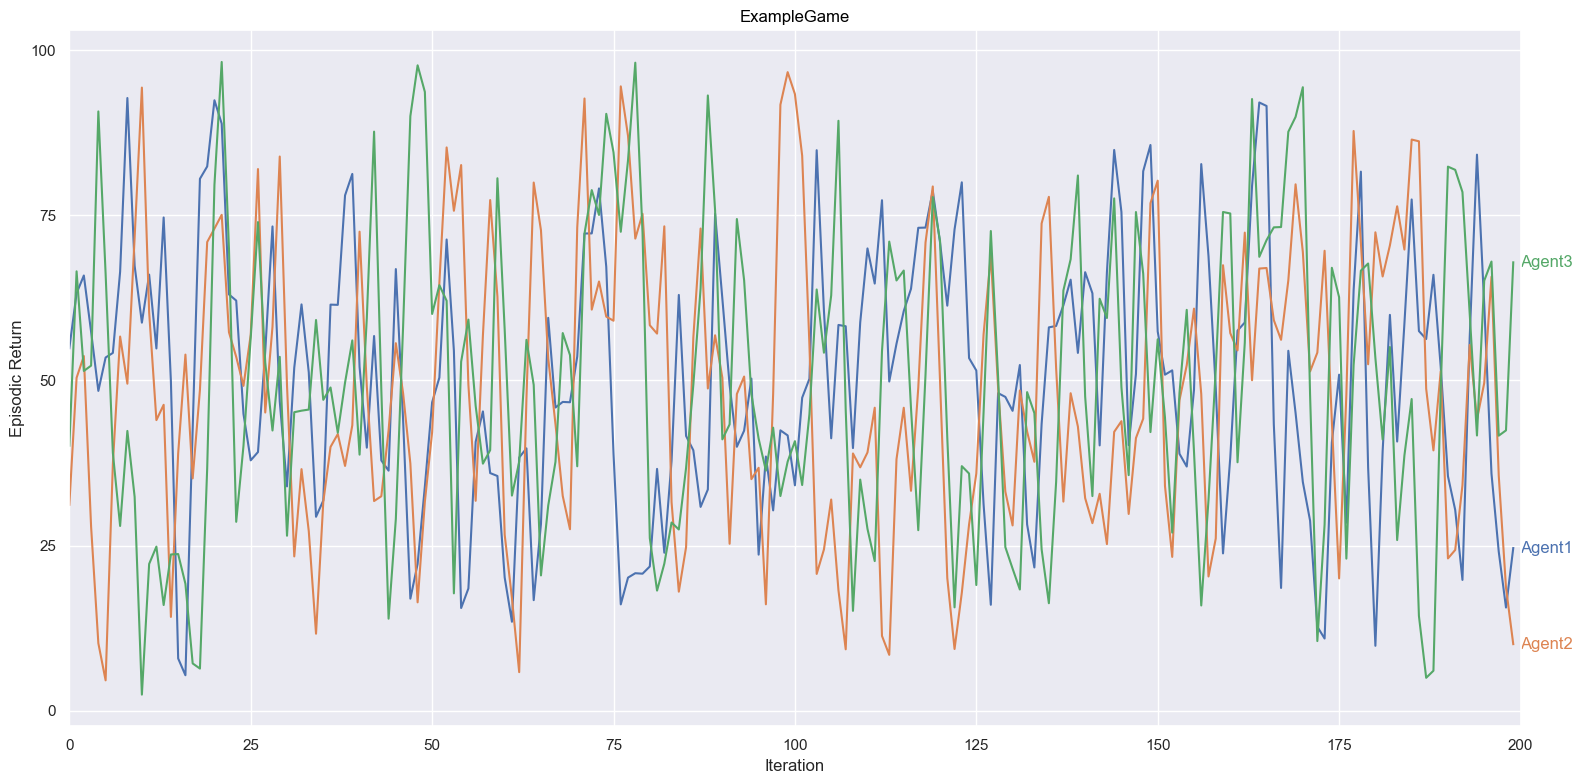

In [3]:
game = "ExampleGame"
fd_data = sample_data()

(
    fd_data.pipe(
        so.Plot, y="Episodic Return", x="Iteration", color="Agent", text="Agent"
    )
    .layout(size=(16, 8))
    # .theme(theme)
    .facet("Game")
    .limit(x=(0, 200))
    .scale(
        x=so.Continuous().tick(at=list(range(0, 201, 25))),
        y=so.Continuous().tick(upto=5).label(like="{x:,.0f}"),
    )
    .add(
        so.Lines(),
        so.Agg(),
        rolling := sor.Rolling(window_type="gaussian", window_kwargs={"std": 2}),
        legend=False,
    )
    .add(
        sor.LineLabel(offset=5),
        so.Agg(),
        rolling,
        legend=False,
    )
    .show()
)

In [4]:

penguins = sns.load_dataset('penguins')

penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


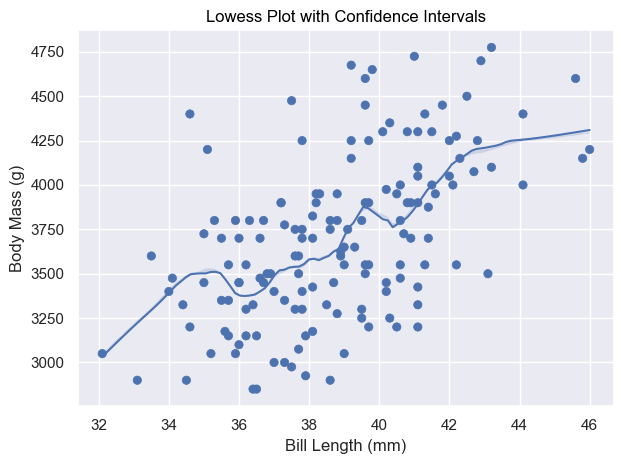

In [5]:
# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Create the plot
plot = (
    so.Plot(data, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(), lowess := sor.Lowess(frac=0.2, gridsize=100, num_bootstrap=200, alpha=0.95))
    .add(so.Band(), lowess)
    .label(x="Bill Length (mm)", y="Body Mass (g)", title="Lowess Plot with Confidence Intervals")
)

# Show the plot
plot.show()

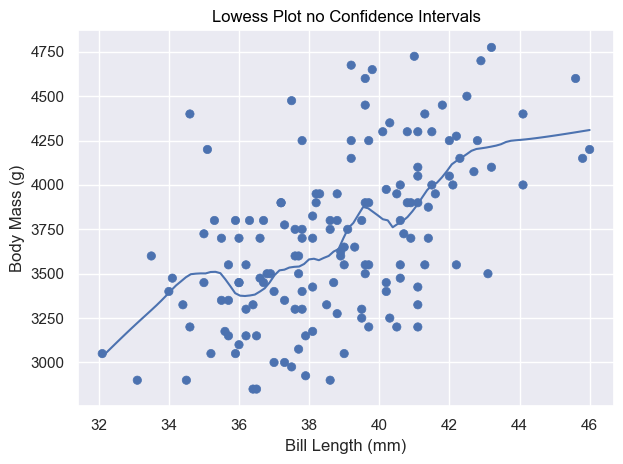

In [6]:
# Example usage with seaborn.objects
# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Create the plot
plot = (
    so.Plot(data, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(), sor.Lowess())
    .label(x="Bill Length (mm)", y="Body Mass (g)", title="Lowess Plot no Confidence Intervals")
)

# Show the plot
plot.show()

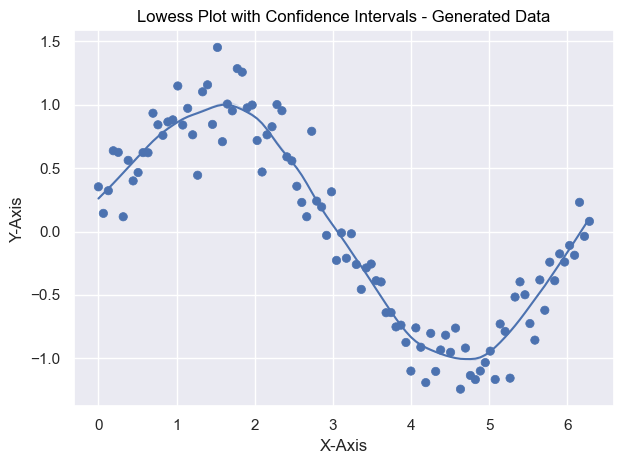

In [7]:
# Generate data for testing
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + np.random.normal(size=100) * 0.2
data = pd.DataFrame({"x": x, "y": y})

# Create the plot
plot = (
    so.Plot(data, x="x", y="y")
    .add(so.Dot())
    .add(so.Line(), lowess := sor.Lowess(frac=0.2, gridsize=100, num_bootstrap=200, alpha=0.95))
    .add(so.Band(), lowess)
    .label(x="X-Axis", y="Y-Axis", title="Lowess Plot with Confidence Intervals - Generated Data")
)

# Show the plot
plot.show()

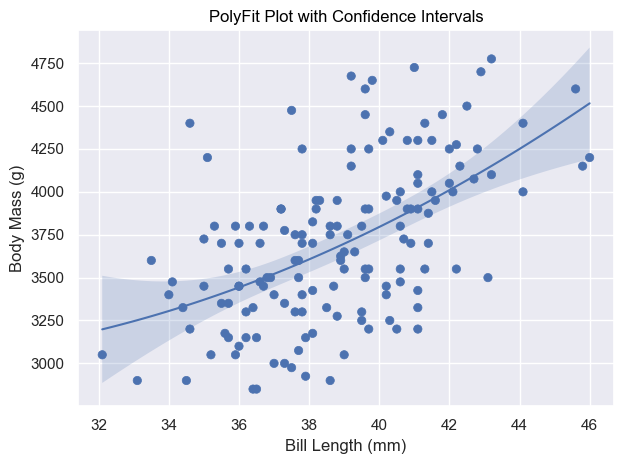

In [8]:
# Example usage with seaborn.objects
# Prepare data
data = penguins.copy()
data = data[data['species'] == 'Adelie']

# Create the plot
plot = (
    so.Plot(data, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot())
    .add(so.Line(), PolyFitWithCI := sor.PolyFitWithCI(order=2, gridsize=100, alpha=0.05))
    .add(so.Band(), PolyFitWithCI)
    .label(x="Bill Length (mm)", y="Body Mass (g)", title="PolyFit Plot with Confidence Intervals")
)

# Show the plot
plot.show()

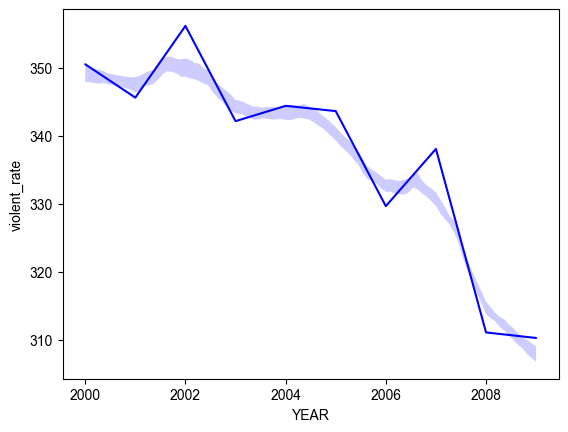

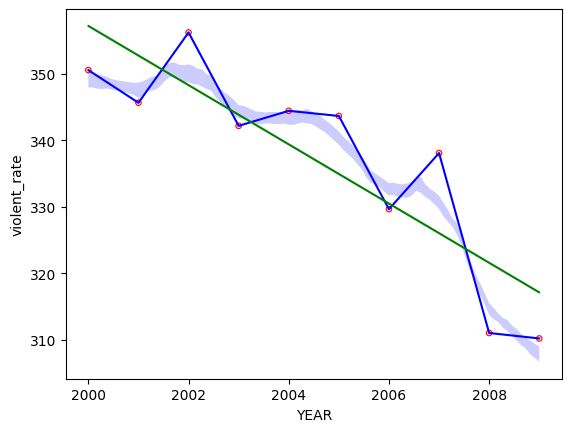

In [ ]:
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("example_data_lower.csv")
annual_averages = df.groupby("YEAR", as_index=False)["violent_rate"].mean()

fig, ax = plt.subplots()
(
    so.Plot(
        df,
        x="YEAR",
        y="violent_rate",
    )
    .add(
        so.Line(color="blue"),
        lowess := sor.Lowess(frac=0.3, it=0, num_bootstrap=2_000, alpha=0.95),
    )
    .add(so.Band(color="blue"), lowess)
).on(ax).show()

so.Plot(
    df,
    x="YEAR",
    y="violent_rate",
).add(
    so.Line(color="green"), so.PolyFit(order=1)
).on(ax).show()

so.Plot(
    annual_averages,
    x="YEAR",
    y="violent_rate",
).add(
    so.Dots(color="red")
).on(ax).show()

fig

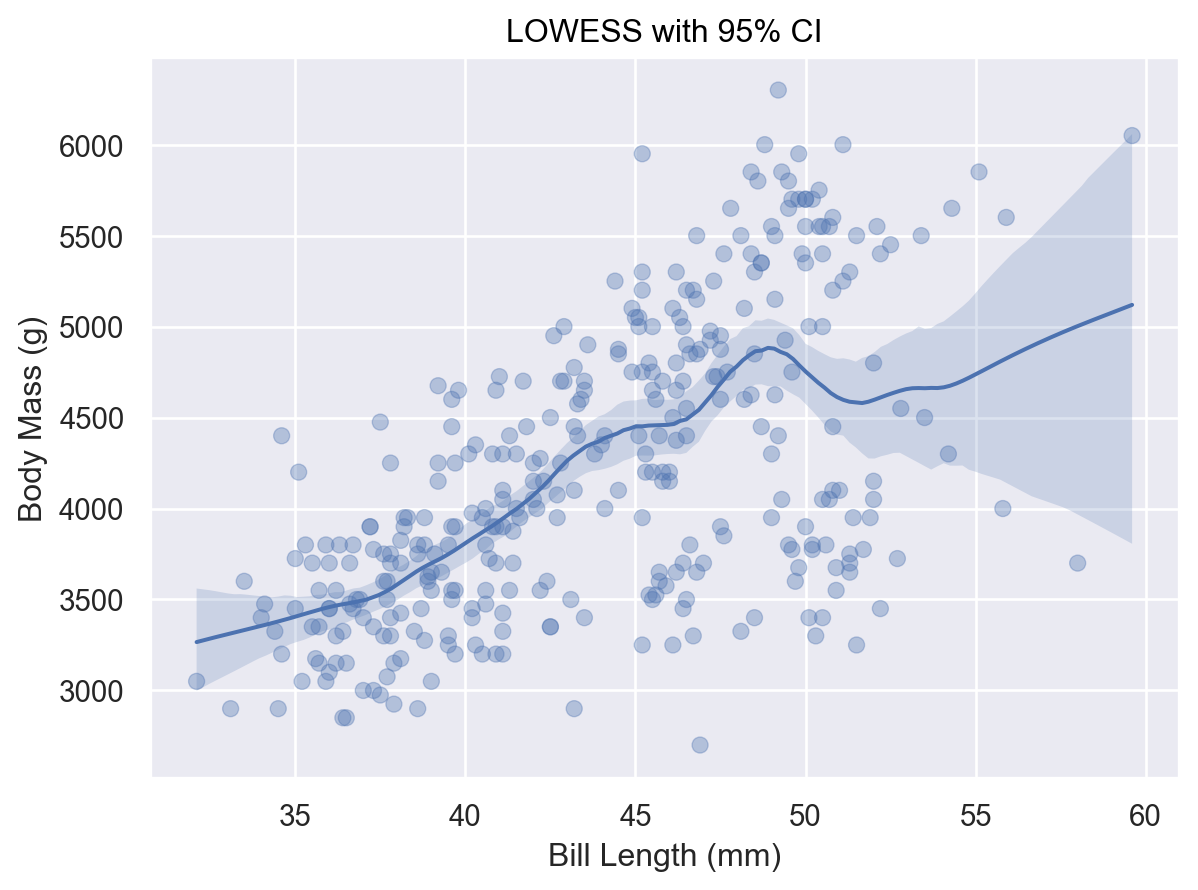

In [ ]:
"""
LOWESS smoothing with optional bootstrap CIs
============================================

This example shows how to use :class:`seaborn_objects_recipes.Lowess` with and
without bootstrap confidence intervals.
"""

import seaborn as sns
import seaborn.objects as so
import seaborn_objects_recipes as sor

# Use a small CI bootstrap for faster docs builds
PENGUINS = sns.load_dataset("penguins").dropna(subset=["bill_length_mm", "body_mass_g"])

# --- With CI band --------------------------------------------------
(
    so.Plot(PENGUINS, x="bill_length_mm", y="body_mass_g")
    .add(so.Dot(alpha=0.35))
    .add(so.Line(), low := sor.Lowess(frac=0.3, gridsize=150, num_bootstrap=200, alpha=0.05))
    .add(so.Band(), low)                 # uses ymin/ymax produced by the stat
    .label(
        title="LOWESS with 95% CI",
        x="Bill Length (mm)",
        y="Body Mass (g)",
    )
    .plot()
)

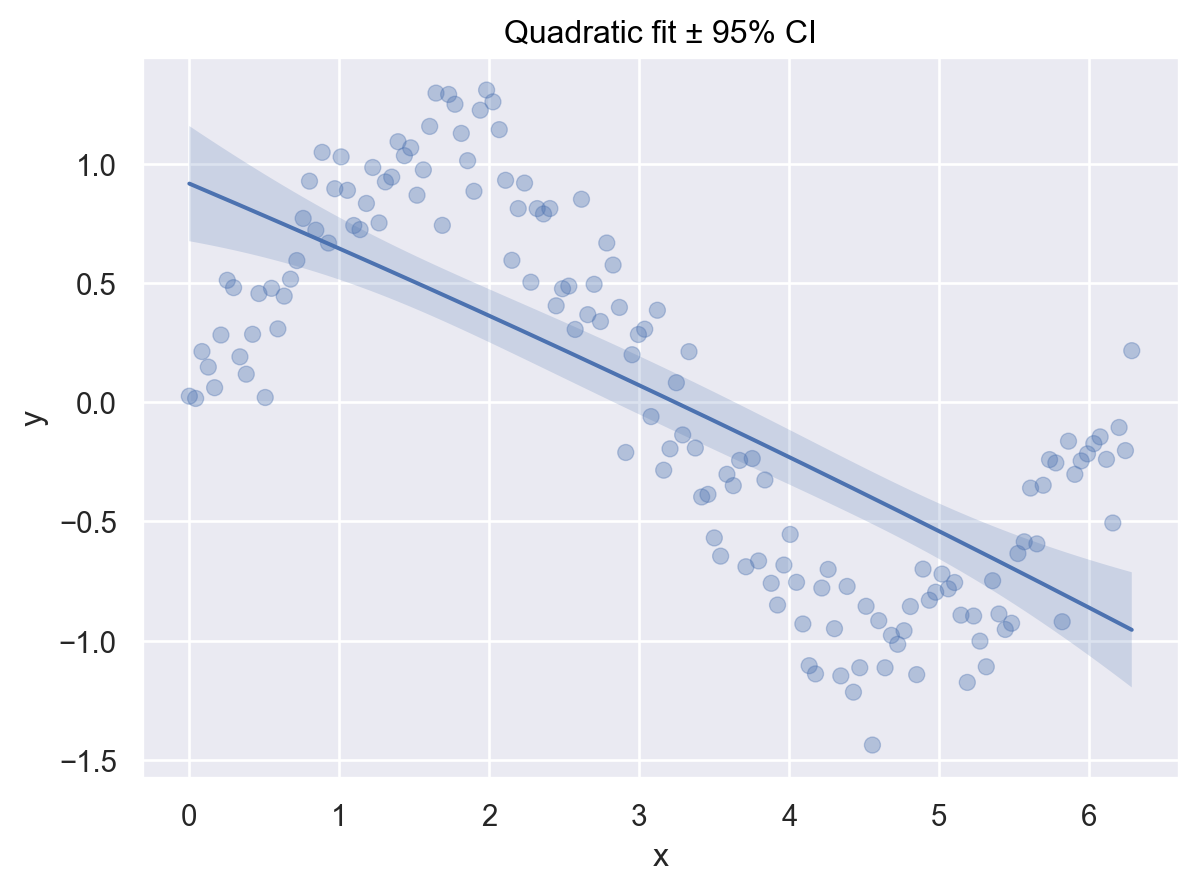

In [ ]:
"""
Polynomial fit with confidence band
===================================
"""
import numpy as np, pandas as pd
import seaborn.objects as so
import seaborn_objects_recipes as sor

rng = np.random.default_rng(0)
x = np.linspace(0, 2*np.pi, 150)
y = np.sin(x) + rng.normal(0, 0.2, size=x.size)
df = pd.DataFrame({"x": x, "y": y})


(
    so.Plot(df, x="x", y="y")
    .add(so.Dot(alpha=0.35))
    .add(so.Line(), pf := sor.PolyFitWithCI(order=2, gridsize=200, alpha=0.05))
    .add(so.Band(), pf)
    .label(title="Quadratic fit ± 95% CI", x="x", y="y")
    .plot()
)

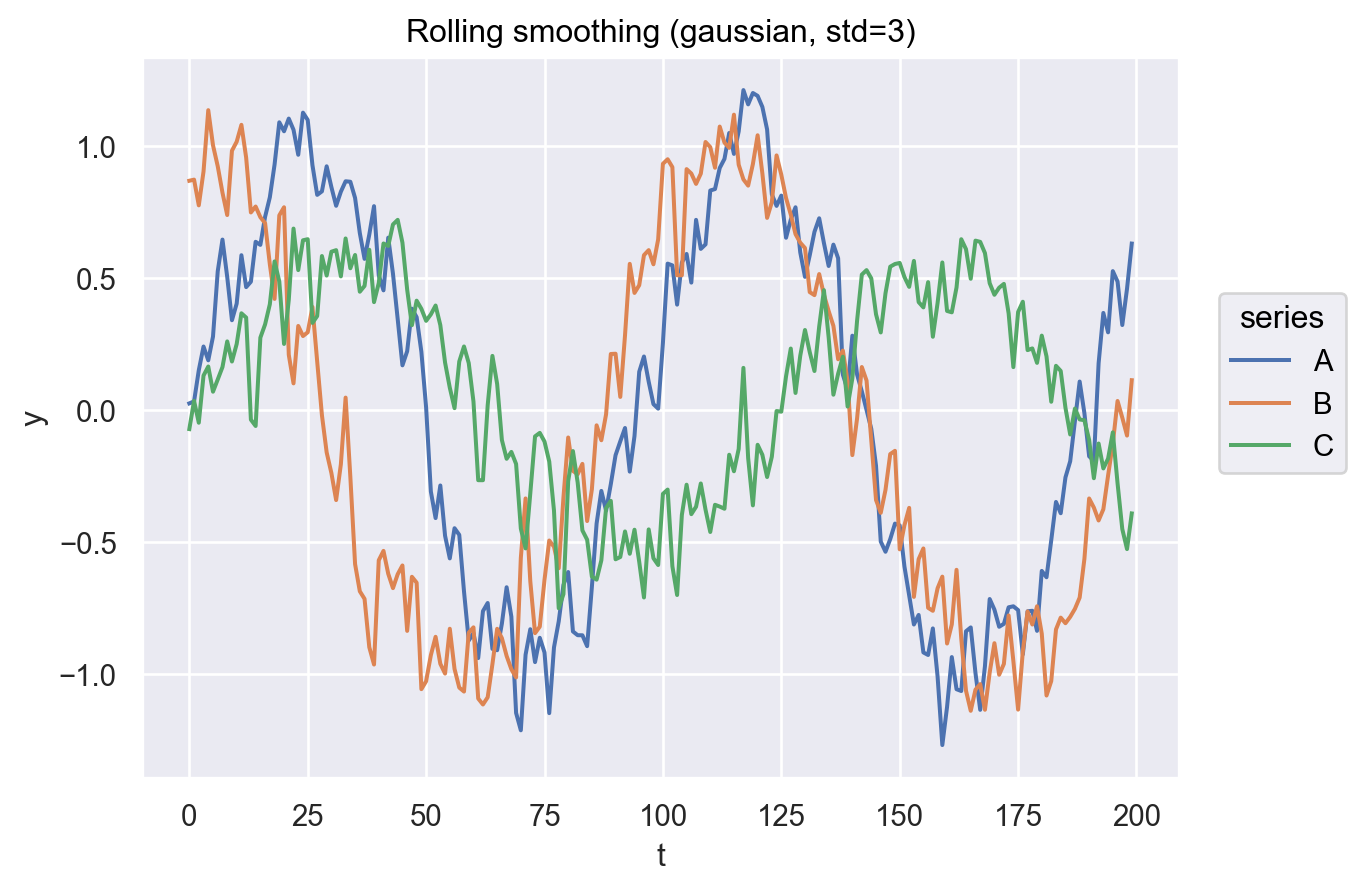

In [16]:
"""
Rolling smoothing for multi-series
==================================
"""
import numpy as np
import pandas as pd
import seaborn.objects as so
import seaborn_objects_recipes as sor

rng = np.random.default_rng(0)
t = np.arange(200)
df = pd.DataFrame({
    "t": np.tile(t, 3),
    "y": np.r_[np.sin(t/15)+rng.normal(0,0.2,200),
               np.cos(t/18)+rng.normal(0,0.2,200),
               0.5*np.sin(t/20)+rng.normal(0,0.2,200)],
    "series": np.repeat(["A","B","C"], 200)
})

roll = sor.Rolling(window_type="gaussian", window_kwargs={"std": 3})

(so.Plot(df, x="t", y="y", color="series")
 .add(so.Lines(), so.Agg(), roll)
 .label(title="Rolling smoothing (gaussian, std=3)", x="t", y="y"))

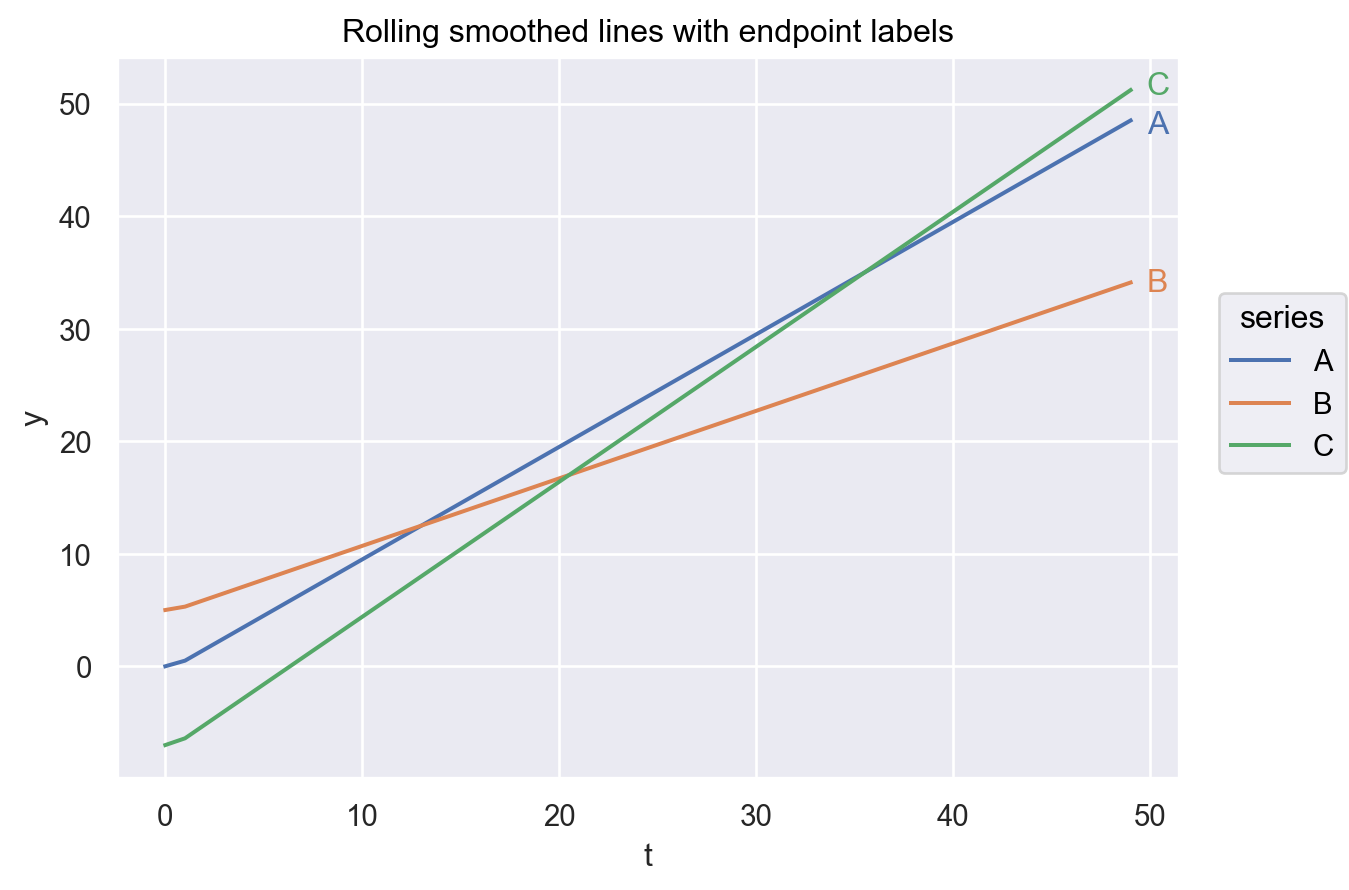

In [ ]:
"""
Line labeling at series endpoints
=================================
"""

import numpy as np
import pandas as pd
import seaborn.objects as so
import seaborn_objects_recipes as sor

t = np.arange(0, 50)
df = pd.DataFrame({
    "t": np.tile(t, 3),
    "y": np.r_[t, t*0.6 + 5, t*1.2 - 7],
    "series": np.repeat(["A", "B", "C"], t.size),
})

(
    so.Plot(df, x="t", y="y", color="series", text="series")
    .add(so.Lines(), so.Agg(), roll := sor.Rolling(window_type="gaussian", window_kwargs={"std": 2}))
    .add(sor.LineLabel(offset=6), so.Agg(), roll)
    .label(title="Rolling smoothed lines with endpoint labels", x="t", y="y")
    .plot()
)